## Введение

В данном проекте выполнен анализ двух тарифов компании "Мегалайн": «Смарт» и «Ультра» по выборке из 500 клиентов. Проверены гипотезы о равенстве выручки пользователей разных тарифов и равенстве выручки пользователей Москвы и других регионов.

## Изучение общей информации и подготовка данных

In [1]:
#Импорт библиотек и загрузка .csv-файлов
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

**Расcмотрим подробнее каждый датафрейм**

### CALLS

In [2]:
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Создадим функцию замены типа данных даты на корректный.

In [4]:
def to_datetime(data, axis):
    return pd.to_datetime(data[axis], format='%Y-%m-%d')

Приведем дату в корректный тип данных

In [5]:
calls['call_date'] = to_datetime(calls, 'call_date')

Добавим столбец с месяцем звонка для дальнейшего анализа

In [6]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

Продолжительность звонков округлим до минут. Округлять будем согласно тарифу, в большую сторону. Тип данных заменим на целочисленные

In [7]:
calls['duration'] = np.ceil(calls['duration']).astype(int)

Проверка на наличие дубликатов

In [8]:
calls.duplicated().sum()

0

### INTERNET

In [9]:
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [10]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Столбец 'Unnamed: 0', скорее всего, дублирует индексы. Проверим это

In [11]:
((internet.index - internet['Unnamed: 0']) == 0).all()

True

Удалим этот столбец

In [12]:
internet.drop('Unnamed: 0', axis=1, inplace=True)

Приведем в порядок тип данных в столбце с датой

In [13]:
internet['session_date'] = to_datetime(internet, 'session_date')

Добавим столбец с месяцем 

In [14]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

Проверим на наличие дубликатов

In [15]:
internet.duplicated().sum()

0

### MESSAGES

In [16]:
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Откорректируем тип данных даты

In [17]:
messages['message_date'] = to_datetime(messages, 'message_date')

Добавим столбец с месяцем

In [18]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

Прjверим на наличие дубликатов

In [19]:
messages.duplicated().sum()

0

### TARIFFS

In [20]:
tariffs.info()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### USERS

In [21]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Пропущенные значения в столбце 'churn_date' означают, что на момент выгрузки данных тариф еще действовал. Так как мы исследуем только 2018 год, заменим пропуски на 31.12.2018

In [22]:
users['churn_date'] = users['churn_date'].fillna('2018-12-31')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  500 non-null    object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Приведем дату прекращения пользования тарифом и дату подключения к корректному типу данных

In [23]:
for i in ['churn_date', 'reg_date']:
    users[i] = to_datetime(users, i)

## Расчет помесячной выручки с каждого пользователя

**Посчитаем для каждого пользователя количество израсходованных минут разговора по месяцам в сводной таблице**

In [24]:
calls_pivot = calls.pivot_table(index=('user_id', 'month'), values='duration', aggfunc='sum').reset_index()

In [25]:
calls_pivot

,user_id,month,duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466
...,...,...,...
3169,1498,10,247
3170,1499,9,70
3171,1499,10,449
3172,1499,11,612


**Посчитаем для каждого пользователя количество отправленных сообщений по месяцам**

In [26]:
messages_pivot = messages.pivot_table(index=('user_id', 'month'), values='id', aggfunc='count').reset_index()

In [27]:
messages_pivot

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


**Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам**

In [28]:
internet_pivot = internet.pivot_table(index=('user_id', 'month'), values='mb_used', aggfunc='sum').reset_index()

In [29]:
internet_pivot

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


**Добавим к датафрейму users столбцы с номером месяца подключения тарифа и месяца прекращения пользования тарифом**

In [30]:
users['reg_month'] = pd.DatetimeIndex(users['reg_date']).month
users['churn_month'] = pd.DatetimeIndex(users['churn_date']).month

In [31]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12
1,1001,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart,11,12
2,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,12
3,1003,23,2018-12-31,Москва,Белла,Белякова,2018-08-17,ultra,8,12
4,1004,68,2018-12-31,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,12
...,...,...,...,...,...,...,...,...,...,...
495,1495,65,2018-12-31,Иркутск,Авксентий,Фокин,2018-08-28,ultra,8,12
496,1496,36,2018-12-31,Вологда,Трифон,Блохин,2018-01-27,smart,1,12
497,1497,32,2018-12-31,Челябинск,Каролина,Агеева,2018-10-09,smart,10,12
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,10


Сперва объединим данные по объему потраченного трафика и продолжительности звонков

In [32]:
svod = calls_pivot.merge(internet_pivot, on=('user_id', 'month'), how='outer') 

Добавим количество отправленных сообщений

In [33]:
svod = svod.merge(messages_pivot, on=('user_id', 'month'), how='outer') 

In [34]:
svod

,user_id,month,duration,mb_used,id
0,1000,5,159.0,2253.49,22.0
1,1000,6,172.0,23233.77,60.0
2,1000,7,340.0,14003.64,75.0
3,1000,8,408.0,14055.93,81.0
4,1000,9,466.0,14568.91,57.0
...,...,...,...,...,...
3209,1489,8,NaN,11050.56,17.0
3210,1489,9,NaN,17206.30,32.0
3211,1489,10,NaN,19559.44,21.0
3212,1489,11,NaN,17491.56,20.0


Объединим полученную сводную таблицу с информацией о пользователях

In [35]:
svod = users.merge(svod, on='user_id', how='outer')

In [36]:
svod 

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,month,duration,mb_used,id
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,5.0,159.0,2253.49,22.0
1,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,6.0,172.0,23233.77,60.0
2,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,7.0,340.0,14003.64,75.0
3,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,8.0,408.0,14055.93,81.0
4,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,9.0,466.0,14568.91,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,10,10.0,247.0,20579.36,42.0
3212,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,9,12,9.0,70.0,1845.75,11.0
3213,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,9,12,10.0,449.0,17788.51,48.0
3214,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,9,12,11.0,612.0,17963.31,59.0


Переименуем столбцы в более понятные для дальнейшего анализа

In [37]:
svod = svod.rename(columns={'id':'messages'})

In [38]:
svod

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,month,duration,mb_used,messages
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,5.0,159.0,2253.49,22.0
1,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,6.0,172.0,23233.77,60.0
2,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,7.0,340.0,14003.64,75.0
3,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,8.0,408.0,14055.93,81.0
4,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,9.0,466.0,14568.91,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,10,10.0,247.0,20579.36,42.0
3212,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,9,12,9.0,70.0,1845.75,11.0
3213,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,9,12,10.0,449.0,17788.51,48.0
3214,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,9,12,11.0,612.0,17963.31,59.0


**Переименуем индексы в таблице "tariffs" на названия тарифов**

In [39]:
tariffs.index = tariffs['tariff_name']
tariffs = tariffs.drop('tariff_name', axis=1)
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
tariff_name,,,,,,,
smart,50,15360,500,550,200,3,3
ultra,1000,30720,3000,1950,150,1,1


**Напишем функцию для одной строки для подсчета выручки**

In [40]:
def add_proceeds(row):
    proceeds = tariffs.loc[row['tariff'], 'rub_monthly_fee']
    if row['duration'] > tariffs.loc[row['tariff'], 'minutes_included']:
        proceeds += (row['duration'] - tariffs.loc[row['tariff'], 'minutes_included']) * tariffs.loc[row['tariff'], 'rub_per_minute']
    if row['mb_used'] > tariffs.loc[row['tariff'], 'mb_per_month_included']:
        proceeds += np.ceil((row['mb_used'] - tariffs.loc[row['tariff'], 'mb_per_month_included'])/1024) * tariffs.loc[row['tariff'], 'rub_per_gb']
    if row['messages'] > tariffs.loc[row['tariff'], 'messages_included']:
        proceeds += (row['messages'] - tariffs.loc[row['tariff'], 'messages_included']) * tariffs.loc[row['tariff'], 'rub_per_message']
    return proceeds

In [41]:
svod['proceeds'] = svod.apply(add_proceeds, axis=1)

In [42]:
svod

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,month,duration,mb_used,messages,proceeds
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,5.0,159.0,2253.49,22.0,1950.0
1,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,6.0,172.0,23233.77,60.0,1950.0
2,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,7.0,340.0,14003.64,75.0,1950.0
3,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,8.0,408.0,14055.93,81.0,1950.0
4,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,12,9.0,466.0,14568.91,57.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,10,10.0,247.0,20579.36,42.0,1750.0
3212,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,9,12,9.0,70.0,1845.75,11.0,550.0
3213,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,9,12,10.0,449.0,17788.51,48.0,1150.0
3214,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,smart,9,12,11.0,612.0,17963.31,59.0,1513.0


**Получили итоговую таблицу "svod", в которой указана помесячная выручка по каждому пользователю**

## Анализ данных

### Длительность разговора

**Найдем среднее значение, дисперсию и стандартное отклонение помесячно длительности разговоров для пользователей разных тарифов**

In [43]:
print('Средняя месячная продолжительность разгоров пользователей тарифа "Смарт" {:.1f}'.format(svod.query('tariff=="smart"')['duration'].mean()))
print('Дисперсия составила {:.1f}, стандартное отклонение {:.1f}'.format(np.var(svod.query('tariff=="smart"')['duration']), np.std(svod.query('tariff=="smart"')['duration'])))
print('Средняя месячная продолжительность разгоров пользователей тарифа "Ультра" {:.1f}'.format(svod.query('tariff=="ultra"')['duration'].mean()))
print('Дисперсия составила {:.1f}, стандартное отклонение {:.1f}'.format(np.var(svod.query('tariff=="ultra"')['duration']), np.std(svod.query('tariff=="ultra"')['duration'])))

Средняя месячная продолжительность разгоров пользователей тарифа "Смарт" 419.1
Дисперсия составила 35828.1, стандартное отклонение 189.3
Средняя месячная продолжительность разгоров пользователей тарифа "Ультра" 545.5
Дисперсия составила 94104.4, стандартное отклонение 306.8


**Визуализируем эти данные в виде гистограмм**

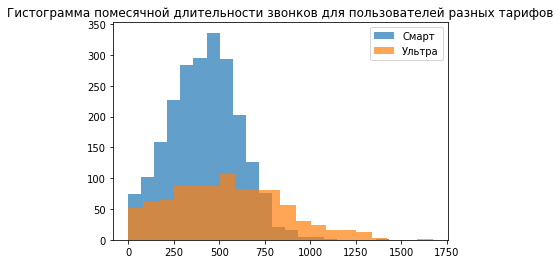

In [44]:
plt.hist(svod.query('tariff=="smart"')['duration'], bins=20, alpha=0.7, label='Смарт')
plt.hist(svod.query('tariff=="ultra"')['duration'], bins=20, alpha=0.7, label='Ультра')
plt.title('Гистограмма помесячной длительности звонков для пользователей разных тарифов')
plt.legend()

**Можно отметить, что продолжительность звонков распределена нормально. Несмотрая на то, что пользователи тарифа "Ультра" действительно звонят больше, чем пользователи тарифа "Смарт", почти никто из них не использует включенное в пакет количество минут даже наполовину (максимальная продолжительность звонков порядка 1750 мин при пакете 3000 мин). Чего нельзя сказать о пользователях тарифа "Смарт" - в среднем они расходуют 419 мин при пакете в 500 мин.**

### Количество отправленных сообщений

**Найдем среднее значение, дисперсию и стандартное отклонение помесячно количества отправленных сообщений для пользователей разных тарифов**

In [45]:
print('Среднее месячное количество сообщений, отправленных пользователями тарифа "Смарт" {:.1f}'.format(svod.query('tariff=="smart"')['messages'].mean()))
print('Дисперсия составила {:.1f}, стандартное отклонение {:.1f}'.format(np.var(svod.query('tariff=="smart"')['messages']), np.std(svod.query('tariff=="smart"')['messages'])))
print('Среднее месячное количество сообщений, отправленных пользователями тарифа "Ультра" {:.1f}'.format(svod.query('tariff=="ultra"')['messages'].mean()))
print('Дисперсия составила {:.1f}, стандартное отклонение {:.1f}'.format(np.var(svod.query('tariff=="ultra"')['messages']), np.std(svod.query('tariff=="ultra"')['messages'])))

Среднее месячное количество сообщений, отправленных пользователями тарифа "Смарт" 38.7
Дисперсия составила 717.2, стандартное отклонение 26.8
Среднее месячное количество сообщений, отправленных пользователями тарифа "Ультра" 61.2
Дисперсия составила 2107.0, стандартное отклонение 45.9


**Визуализируем эти данные в виде гистограмм**

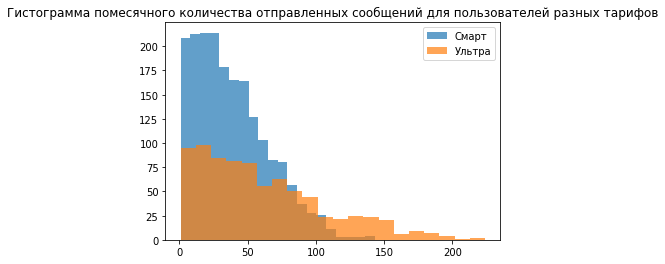

In [46]:
plt.hist(svod.query('tariff=="smart"')['messages'], bins=20, alpha=0.7, label='Смарт')
plt.hist(svod.query('tariff=="ultra"')['messages'], bins=20, alpha=0.7, label='Ультра')
plt.title('Гистограмма помесячного количества отправленных сообщений для пользователей разных тарифов')
plt.legend()

**Распределение количества отправленных сообщений имеет характер распределения Пуассона - наибольшую частоту принимает наименьшее количество отправленных сообщений. Вероятно, это связано с популярностью мессенджеров - пользователи предпочитают отправлять личные сообщения используя интернет связь. Несмотря на небольшое количество включенных в пакет тарифа "Смарт" сообщений, в среднем пользователи расходуют большую часть пакета - 39 сообщений из 50 возможных. Пользователи тарифа "Ультра", наоборот, отправляют в среднем 61 сообщение при максимальном количестве отправленных за месяц сообщений чуть более 200, в то время как в пакет их тарифа включена 1000 сообщений. Возможно, им стоит пересмотреть свой тариф.**

### Объем использованного интернет-трафика

**Найдем среднее значение, дисперсию и стандартное отклонение использованного трафика для пользователей разных тарифов**

In [47]:
print('Среднее месячное количество использованного трафика пользователями тарифа "Смарт" {:.1f}'.format(svod.query('tariff=="smart"')['mb_used'].mean()))
print('Дисперсия составила {:.1f}, стандартное отклонение {:.1f}'.format(np.var(svod.query('tariff=="smart"')['mb_used']), np.std(svod.query('tariff=="smart"')['mb_used'])))
print('Среднее месячное количество использованного трафика пользователями тарифа "Ультра" {:.1f}'.format(svod.query('tariff=="ultra"')['mb_used'].mean()))
print('Дисперсия составила {:.1f}, стандартное отклонение {:.1f}'.format(np.var(svod.query('tariff=="ultra"')['mb_used']), np.std(svod.query('tariff=="ultra"')['mb_used'])))

Среднее месячное количество использованного трафика пользователями тарифа "Смарт" 16215.7
Дисперсия составила 34344529.8, стандартное отклонение 5860.4
Среднее месячное количество использованного трафика пользователями тарифа "Ультра" 19668.5
Дисперсия составила 98762849.7, стандартное отклонение 9937.9


**Визуализируем эти данные в виде гистограмм**

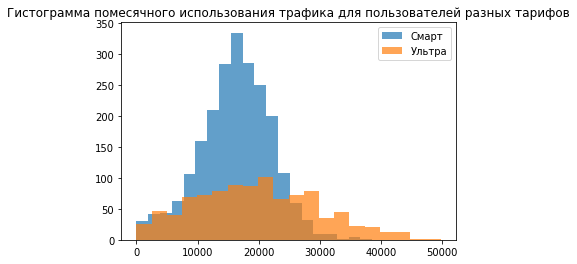

In [48]:
plt.hist(svod.query('tariff=="smart"')['mb_used'], bins=20, alpha=0.7, label='Смарт')
plt.hist(svod.query('tariff=="ultra"')['mb_used'], bins=20, alpha=0.7, label='Ультра')
plt.title('Гистограмма помесячного использования трафика для пользователей разных тарифов')
plt.legend()

**Ежемесячное использование трафика имеет нормальный вид распределения. Пользователи тарифа "Смарт" в большинстве своем превышают предоставленный пакет в 15 ГБ.**

### Результаты анализа

**Распределения продолжительности звонков и использования интернета имеют нормальный характер, в то время как количесвто отправленных сообщений имеет распределение ~~Гаусса~~ Пуассона. Предоставленное для пользователей траифа "Ультра" количество минут и сообщений в несколько раз превышает их потребность, а доступный пакет интернет-трафика недостаточен для пользователей тарифа "Смарт".**

## Проверка гипотез

### Средняя выручка тарифов "Ультра" и "Смарт" различается

**Нулевая гипотеза H0 - cредняя выручка тарифов "Ультра" и "Смарт" не различается. Альтернативная гипотеза H1 - cредняя выручка тарифов "Ультра" и "Смарт" различается. Уровень значимости примем за 5 %.**

In [49]:
alpha = 0.05 #Критический уровень статистической значимости
results = st.ttest_ind(svod.query('tariff=="smart"')['proceeds'], svod.query('tariff=="ultra"')['proceeds'])
print('p-value =', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')
print('Средняя выручка по пользователям тарифа "Смарт":', svod.query('tariff=="smart"')['proceeds'].mean())
print('Средняя выручка по пользователям тарифа "Ультра":', svod.query('tariff=="ultra"')['proceeds'].mean())

p-value = 8.081909555489933e-161
Отвергаем нулевую гипотезу
Средняя выручка по пользователям тарифа "Смарт": 1289.6417040358745
Средняя выручка по пользователям тарифа "Ультра": 2070.030425963489


**Результаты анализа показывают, что вероятность получить данную выборку при равной выручке тарифов "Ультра" и "Смарт" практически равна нулю. На этом основании мы отвергаем нулевую гипотезу о том, что cредняя выручка тарифов "Ультра" и "Смарт" одинаковая, и делаем вывод, что выручка тарифов "Ультра" и "Смарт" различается. Выручка по пользователям тарифа "Смарт" существенно выше.**

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Нулевая гипотеза H0 - cредняя выручка пользователей из Москвы и других регионов одинаковая. Альтернативная гипотеза H1 - cредняя выручка пользователей из Москвы и других регионов различается. Уровень значимости примем за 5 %.**

In [50]:
alpha = 0.05 #Критический уровень статистической значимости
results = st.ttest_ind(svod.query('city=="Москва"')['proceeds'], svod.query('city!="Москва"')['proceeds'])
print('p-value =', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')
print('Средняя выручка по пользователям Москвы:', svod.query('city=="Москва"')['proceeds'].mean())
print('Средняя выручка по пользователям других регионов:', svod.query('city!="Москва"')['proceeds'].mean())

p-value = 0.5400751614511182
Не отвергаем нулевую гипотезу
Средняя выручка по пользователям Москвы: 1546.7135842880523
Средняя выручка по пользователям других регионов: 1524.7251439539348


**Вероятность получить такую выборку при равной выручке из Москвы и других регионов довольно высока, значит, мы не можем опровергнуть нулевую гипотезу. Тогда альтернативную гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, можно считать недоказанной.**

## Общий вывод

**В этом проекте выполнен анализ двух тарифов "Мегалайна" по выборке из 500 клиентов. Для этого были подготовлены данные, создана сводная таблица с помесячной выручкой по каждому пользователю. По результатам анализа определено, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Выручка пользователей Москвы и других регионов значительно не отличается.**